# Library Import 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Preparing the data 
## Loading Data from HDF5

In [3]:
database_path = "data/crypto_database.h5"
df = pd.read_hdf(database_path, key="BTCUSDT")

## Data Cleaning and Preprocessing

In [5]:
# Check for missing values
print(df.isnull().sum())

# Convert 'Open_Time' to datetime if not already done
df.reset_index(inplace=True)
df['Open_Time'] = pd.to_datetime(df['Open_Time'])

# Set 'Open_Time' as the index
df.set_index('Open_Time', inplace=True)

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Quote_Asset_Volume              0
Number_of_Trades                0
Taker_Buy_Base_Asset_Volume     0
Taker_Buy_Quote_Asset_Volume    0
Ignore                          0
dtype: int64


## Taking a look at the data

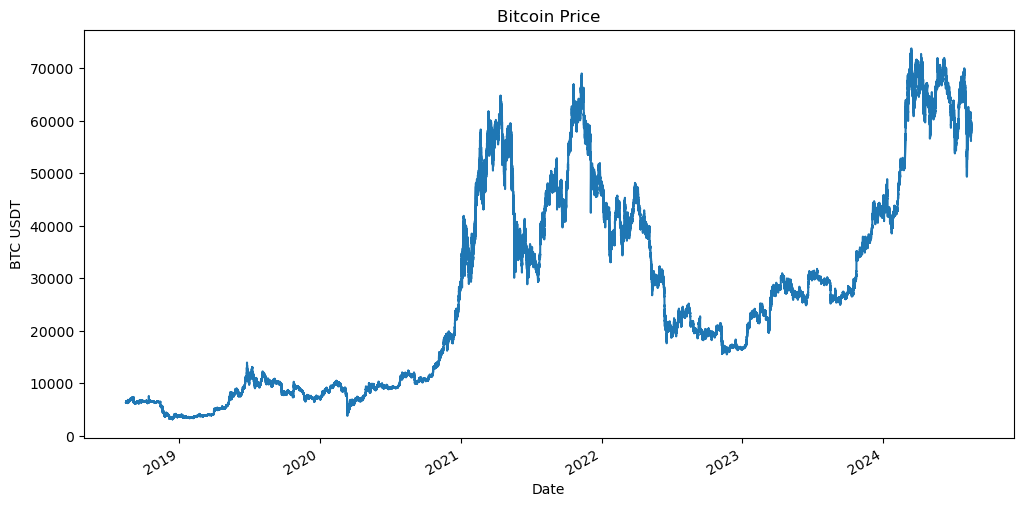

In [6]:
# Plot the log returns
plt.figure(figsize=(12, 6))
df['Close'].plot()
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('BTC USDT')
plt.show()

# Calculating log returns 
## Implementing log returns calculation 

In [8]:
# Calculate log returns
df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Drop the NaN value created by the shift
df.dropna(subset=['log_returns'], inplace=True)

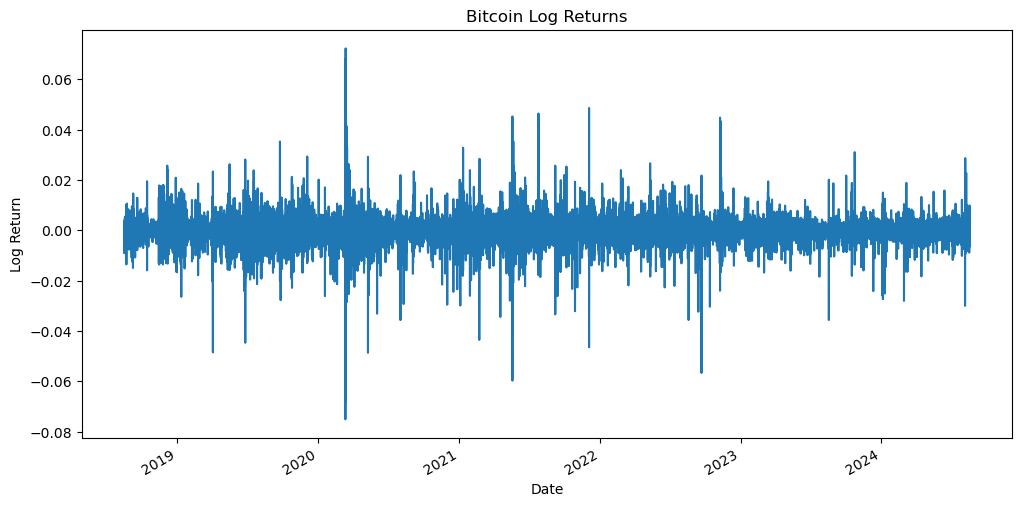

In [9]:
# Plot the log returns
plt.figure(figsize=(12, 6))
df['log_returns'].plot()
plt.title('Bitcoin Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

# The EWMA Estimator 

In [10]:
# Set the decay factor
lambda_ = 0.94
alpha = 1 - lambda_

# Calculate the EWMA variance
df['ewma_variance'] = df['log_returns'].ewm(alpha=alpha, adjust=False).var()

# Calculate the EWMA volatility
df['ewma_volatility'] = np.sqrt(df['ewma_variance'])

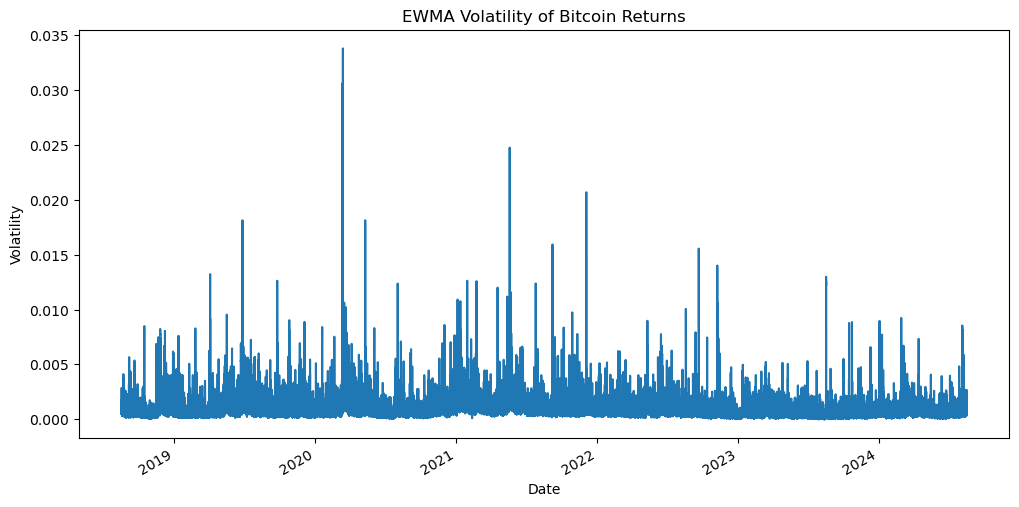

In [11]:
# Plot the EWMA volatility
plt.figure(figsize=(12, 6))
df['ewma_volatility'].plot()
plt.title('EWMA Volatility of Bitcoin Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()